In [5]:
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings 

In [2]:
# set mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.sans-serif'] = 'SimHei'

In [17]:
# pearson: 皮尔逊积矩相关系数 Pearson product-moment correlation coefficient
# 用于度量两个变量X和Y之间的相关（线性相关）
def calc_pearson(x, y):
    std1 = np.std(x)
    # np.sqrt(np.mean(x**2) - np.mean(x)**2)
    std2 = np.std(y)
    cov = np.cov(x, y, bias=True)[0,1]
    return cov / (std1 * std2)

def intro():
    N = 10
    x = np.random.rand(N)
    y = 2 * x + np.random.randn(N) * 0.1
    print(x)
    print(y)
    print('系统计算：', stats.pearsonr(x, y)[0])
    print('手动计算：', calc_pearson(x, y))


# matrix rotation
def rotate(x, y, theta=45):
    data = np.vstack((x, y))
    # print data
    mu = np.mean(data, axis=1)
    mu = mu.reshape((-1, 1))
    # print mu
    data -= mu
    # print data
    theta *= (np.pi / 180)
    c = np.cos(theta)
    s = np.sin(theta)
    m = np.array(((c, -s), (s, c)))
    return m.dot(data) + mu


def plot_pearson(x, y, tip):
    clrs = list('rgbmycrgbmycrgbmycrgbmyc')
    plt.figure(figsize=(10, 8), facecolor='w')
    for i, theta in enumerate(np.linspace(0, 90, 6)):
        xr, yr = rotate(x, y, theta)
        p = stats.pearsonr(xr, yr)[0]
        #print (calc_pearson(xr, yr))
        print('旋转角度：', theta, 'Pearson相关系数：', p)
        str = '相关系数：%.3f' % p
        plt.scatter(xr, yr, s=40, alpha=0.9, linewidths=0.5, c=clrs[i], marker='o', label=str)
    plt.legend(loc='upper left', shadow=True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Pearson相关系数与数据分布：%s' % tip, fontsize=18)
    plt.grid(b=True)
    plt.show()

In [9]:
# Main function
np.random.seed(0)

intro()

[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548   0.64589411
  0.43758721  0.891773    0.96366276  0.38344152]
[ 1.11203136  1.57580608  1.28163052  1.10193387  0.89169592  1.32515566
  1.02458233  1.76303018  1.95863229  0.68147346]
系统计算： 0.983874391143
手动计算： 0.983874391143


旋转角度： 0.0 Pearson相关系数： 0.0175503027407
旋转角度： 18.0 Pearson相关系数： 0.999933265232
旋转角度： 36.0 Pearson相关系数： 0.999974501619
旋转角度： 54.0 Pearson相关系数： 0.999974497668
旋转角度： 72.0 Pearson相关系数： 0.999933221419
旋转角度： 90.0 Pearson相关系数： -0.0175503027407


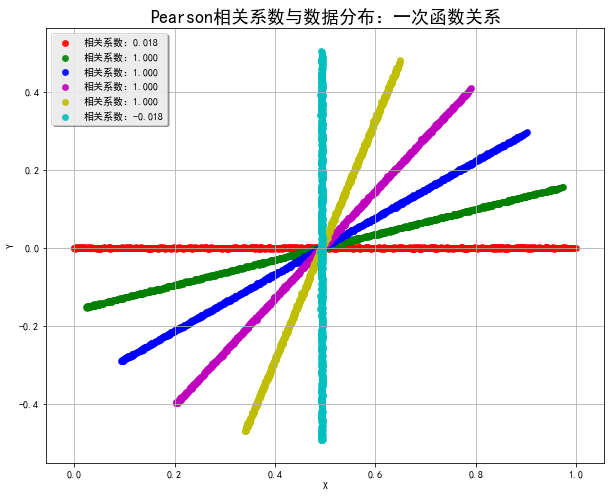

In [18]:
N = 1000
tip = '一次函数关系'
x = np.random.rand(N)
y = np.zeros(N) + np.random.randn(N)*0.001
plot_pearson(x, y, tip)

旋转角度： 0.0 Pearson相关系数： 0.967784319279
旋转角度： 18.0 Pearson相关系数： 0.950154585661
旋转角度： 36.0 Pearson相关系数： 0.736018442945
旋转角度： 54.0 Pearson相关系数： -0.789957650529
旋转角度： 72.0 Pearson相关系数： -0.953722775182
旋转角度： 90.0 Pearson相关系数： -0.967784319279


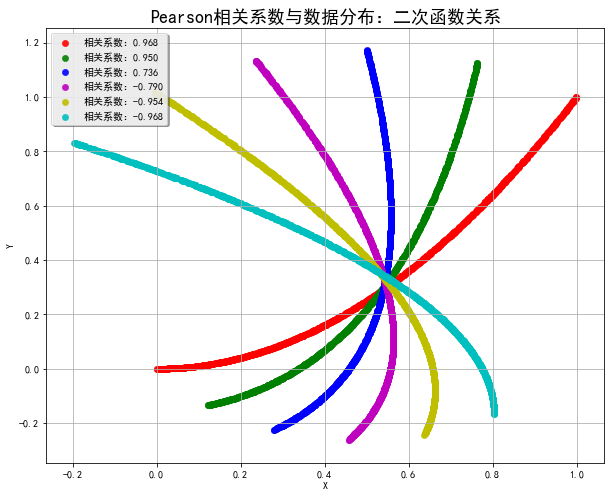

In [19]:
tip = u'二次函数关系'
x = np.random.rand(N)
y = x ** 2
plot_pearson(x, y, tip)

旋转角度： 0.0 Pearson相关系数： 0.891053766808
旋转角度： 18.0 Pearson相关系数： -0.183399950295
旋转角度： 36.0 Pearson相关系数： -0.914806978891
旋转角度： 54.0 Pearson相关系数： -0.961069184188
旋转角度： 72.0 Pearson相关系数： -0.958520515826
旋转角度： 90.0 Pearson相关系数： -0.891053766808


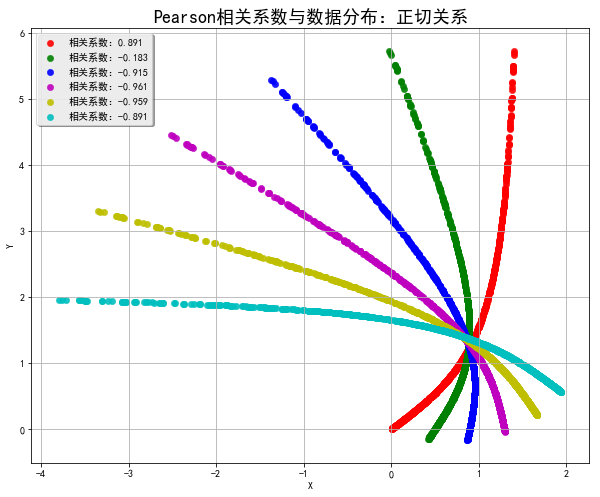

In [20]:
tip = u'正切关系'
x = np.random.rand(N) * 1.4
y = np.tan(x)
plot_pearson(x, y, tip)

旋转角度： 0.0 Pearson相关系数： -0.0139497088278
旋转角度： 18.0 Pearson相关系数： 0.818528874597
旋转角度： 36.0 Pearson相关系数： 0.918287610936
旋转角度： 54.0 Pearson相关系数： 0.918820189214
旋转角度： 72.0 Pearson相关系数： 0.822741014086
旋转角度： 90.0 Pearson相关系数： 0.0139497088278


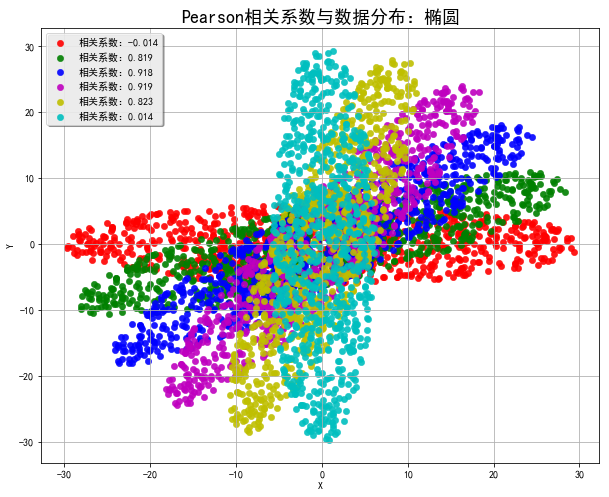

In [21]:
tip = u'椭圆'
x, y = np.random.rand(2, N) * 60 - 30
y /= 5
idx = (x**2 / 900 + y**2 / 36 < 1)
x = x[idx]
y = y[idx]
plot_pearson(x, y, tip)